**DECISION TREE**

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

**Membaca dan Menampilkan Data**

In [ ]:
#Dataset Play Golf (14 observasi)
data = {
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
print("--- Dataset ---")
print(df)

--- Dataset ---
     Outlook  Temp Humidity  Windy PlayGolf
0      Rainy   Hot     High  False       No
1      Rainy   Hot     High   True       No
2   Overcast   Hot     High  False      Yes
3      Sunny  Mild     High  False      Yes
4      Sunny  Cool   Normal  False      Yes
5      Sunny  Cool   Normal   True       No
6   Overcast  Cool   Normal   True      Yes
7      Rainy  Mild     High  False       No
8      Rainy  Cool   Normal  False      Yes
9      Sunny  Mild   Normal  False      Yes
10     Rainy  Mild   Normal   True       No
11  Overcast  Mild     High   True      Yes
12  Overcast   Hot   Normal  False      Yes
13     Sunny  Mild     High   True       No


**FUNGSI PERHITUNGAN ENTROPY & INFORMATION GAIN**

In [ ]:
def entropy(target_col):
    """Menghitung Entropy untuk kolom target."""
    elements, counts = np.unique(target_col, return_counts=True)

    # Rumus Entropy: E(S) = -Σ (p_i * log2(p_i))
    entropy_val = np.sum([(-counts[i]/np.sum(counts)) * log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_val

def info_gain(data, split_attribute_name, target_name="PlayGolf"):
    """Menghitung Information Gain untuk atribut tertentu."""

    # 3a. Entropy Total (sebelum split)
    total_entropy = entropy(data[target_name])

    # 3b. Entropy Rata-rata Tertimbang (setelah split)
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    # 3c. Information Gain: IG = E_total - E_weighted
    information_gain = total_entropy - weighted_entropy
    return information_gain


**APLIKASI DAN PENENTUAN ROOT NODE**

In [ ]:
print("\n--- Perhitungan ID3 ---")
# Menghitung Entropy Awal (target: PlayGolf)
initial_entropy = entropy(df["PlayGolf"])
print(f"Entropy (PlayGolf): {initial_entropy:.4f}")

# Menghitung Information Gain untuk semua fitur
for col in df.columns[:-1]:
    ig = info_gain(df, col)
    print(f"Information Gain ({col}): {ig:.4f}")

# Catatan: Atribut dengan Information Gain tertinggi (Outlook: 0.3806)
# dipilih sebagai node akar (root node) dari Decision Tree.


--- Perhitungan ID3 ---
Entropy (PlayGolf): 0.9852
Information Gain (Outlook): 0.3806
Information Gain (Temp): 0.0391
Information Gain (Humidity): 0.0611
Information Gain (Windy): 0.1281


**PEMBANGUNAN MODEL DECISION TREE DENGAN SCIKIT-LEARN**


--- Struktur Decision Tree (Teks) ---
|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Windy <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Humidity <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 1
|   |--- Windy >  0.50
|   |   |--- class: 0


--- Struktur Decision Tree (Visualisasi) ---


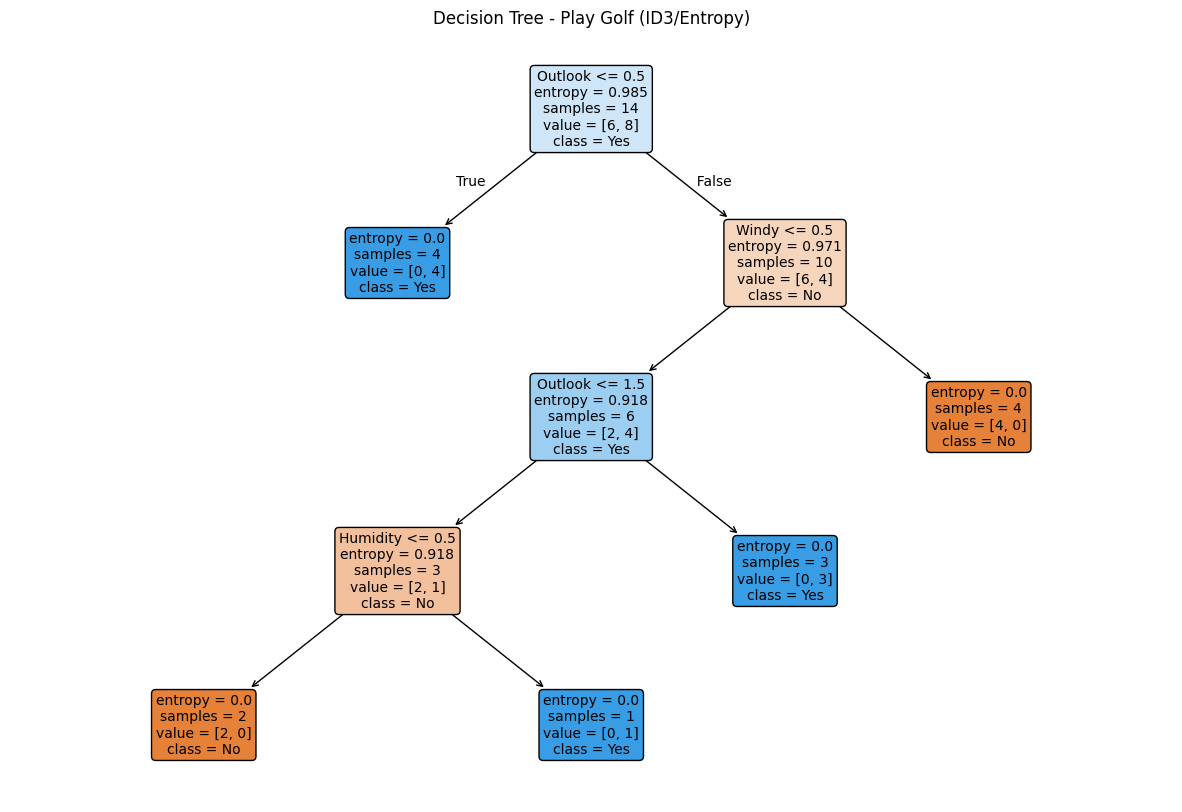

In [ ]:
# 5a. Data Pre-processing: Konversi data kategorikal ke numerik (Label Encoding)
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['PlayGolf'])
y = df_encoded['PlayGolf']

# 5b. Buat dan Latih Model Decision Tree (menggunakan kriteria 'entropy' = ID3)
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# 5c. Cetak Struktur Pohon dalam bentuk teks
print("\n--- Struktur Decision Tree (Teks) ---")
r = export_text(clf, feature_names=list(X.columns))
print(r)

# 5d. Visualisasi Struktur Pohon
print("\n--- Struktur Decision Tree (Visualisasi) ---")
plt.figure(figsize=(15, 10))
plot_tree(clf,
          feature_names=list(X.columns),
          # Nama kelas (0: No, 1: Yes, berdasarkan LabelEncoder)
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree - Play Golf (ID3/Entropy)")
plt.show()